In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 5.8MB/s 
     |████████████████████████████████| 2.1MB 20.7MB/s 
     |████████████████████████████████| 9.5MB 28.0MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import pandas as pd
import statsmodels.graphics.tsaplots as sgt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from fbprophet import Prophet
import warnings
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")
sns.set()

### Datos

In [26]:
train = pd.read_csv('/content/2005_2006_flights.csv')
test = pd.read_csv('/content/2007_flights.csv')

In [4]:
train.head(2)

,year_month,count
0,2005-01-01,594924
1,2005-02-01,545332


### Auto Arima

In [5]:
train_autoarima = train.copy()
test_autoarima = test.copy()

In [6]:
train_autoarima.year_month = pd.to_datetime(train_autoarima.year_month)
train_autoarima.set_index("year_month", inplace=True)
train_autoarima.head(2)

,count
year_month,
2005-01-01,594924
2005-02-01,545332


In [7]:
test_autoarima.year_month = pd.to_datetime(test_autoarima.year_month)
test_autoarima.set_index("year_month", inplace=True)
test_autoarima.head(2)

,count
year_month,
2007-01-01,621559
2007-02-01,565604


In [8]:
train_autoarima.index.freq = 'MS'
train_autoarima.index

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01', '2005-11-01', '2005-12-01',
               '2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01', '2006-11-01', '2006-12-01'],
              dtype='datetime64[ns]', name='year_month', freq='MS')

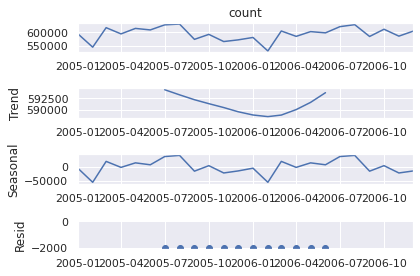

In [9]:
sd = seasonal_decompose(train_autoarima['count'], model='add')
sd.plot();

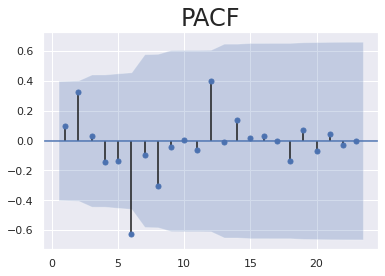

In [10]:
plot_acf(train_autoarima['count'], lags = 23, zero = False)
plt.title("PACF", size = 24)
plt.show()

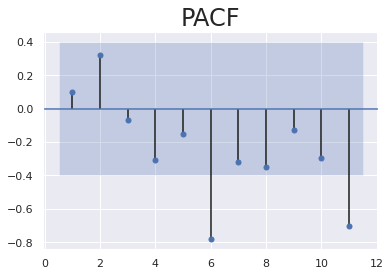

In [13]:
plot_pacf(train_autoarima['count'], lags = 11, zero = False, method = ('ols'))
plt.title("PACF", size = 24)
plt.show()

In [14]:
model_auto = auto_arima(train_autoarima)

In [15]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -272.794
Date:                Mon, 11 Jan 2021   AIC                            557.587
Time:                        17:23:50   BIC                            564.656
Sample:                             0   HQIC                           559.462
                                 - 24                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.875e+05    1.6e-06   2.41e+11      0.000    3.88e+05    3.88e+05
ar.L1          0.6899      0.426      1.620      0.105      -0.145       1.525
ar.L2         -0.3416      0.425     -0.804      0.422      -1.175       0.492
ma.L1         -0.8007      0.430     -1.863      0.062      -1.643       0.042
ma.L2          0.9368      0.604      1.550      0.121      -0.248       2.121
sigma2       4.65e+08   1.84e-09   2.52e+17      0.000    4.65e+08    4.65e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.24
Prob(Q):                              0.98   Prob(JB):                         0.20
Heteroskedasticity (H):               0.43   Skew:                            -0.90
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.21e+33. Standard errors may be unstable.
"""

### Predicciones

In [16]:
len(test_autoarima)

12

In [17]:
pred = pd.DataFrame(model_auto.predict(n_periods = len(test_autoarima)), index = test_autoarima.index)

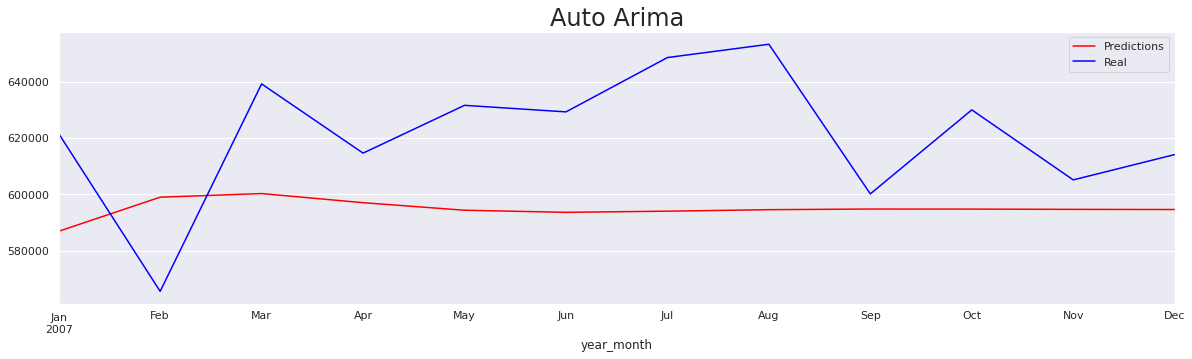

In [18]:
pred.plot(figsize = (20,5), color = "red")
test_autoarima['count'].plot(color = "blue")
plt.title("Auto Arima", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

### Configurando Auto Arima

In [19]:
model_auto = auto_arima(train_autoarima, start_p=1,start_q=1, max_p=12,max_q=12, max_order=None,start_P=1,start_Q=0,m=12,d=0,D=1)
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   24
Model:             SARIMAX(3, 0, 2)x(0, 1, [], 12)   Log Likelihood                   0.000
Date:                             Mon, 11 Jan 2021   AIC                             14.000
Time:                                     17:30:52   BIC                             17.394
Sample:                                          0   HQIC                            12.743
                                              - 24                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.387e+04         -0        inf      0.000   -1.39e+04   -1.39e+04
ar.L1              -0         -0        nan        nan           0          -0
ar.L2              -0         -0        nan        nan           0          -0
ar.L3              -0         -0        nan        nan           0          -0
ma.L1               0         -0        nan        nan           0           0
ma.L2              -0         -0        nan        nan           0          -0
sigma2          1e-10         -0       -inf      0.000       1e-10       1e-10
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                 4.50
Prob(Q):                               nan   Prob(JB):                         0.11
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         0.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

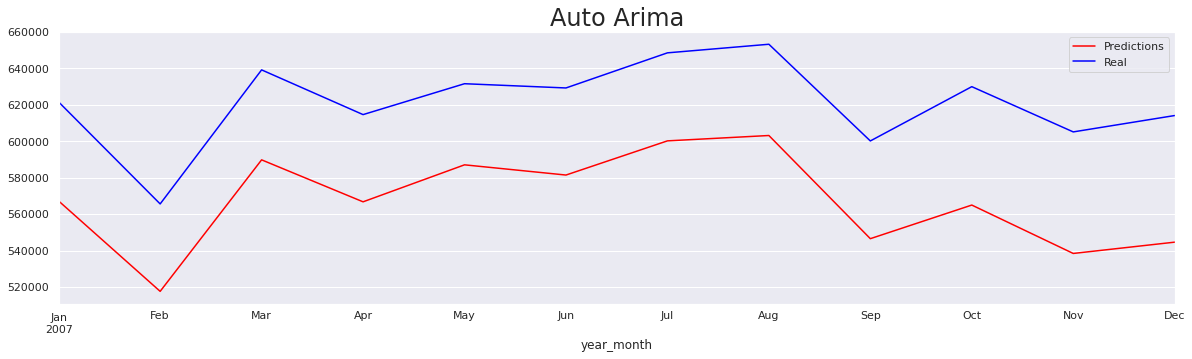

In [20]:
pred = pd.DataFrame(model_auto.predict(n_periods = len(test_autoarima)), index = test_autoarima.index)
pred.plot(figsize = (20,5), color = "red")
test_autoarima['count'].plot(color = "blue")
plt.title("Auto Arima", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

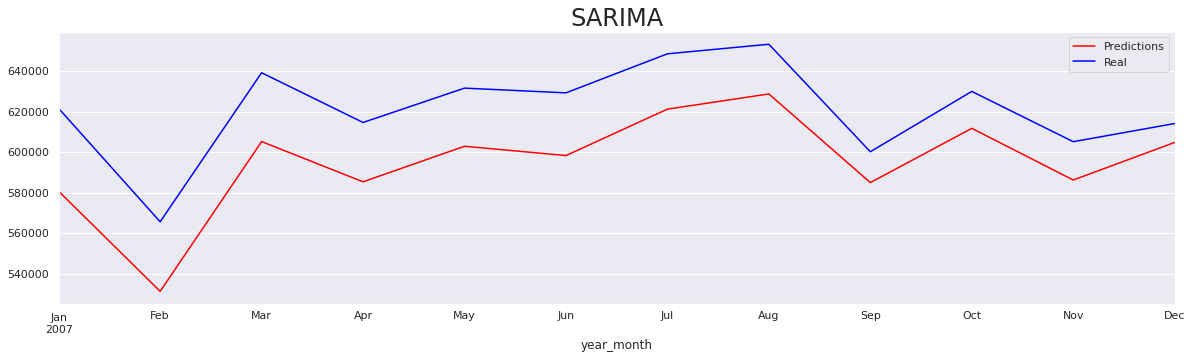

In [21]:
model_sarima = SARIMAX(train_autoarima, order = (1,0,0), seasonal_order = (1,1,1,12))
results_sarima = model_sarima.fit()
start_date='2007-01-01'
end_date='2007-12-01'
pred_sarima = results_sarima.predict(start = start_date, end = end_date)

pred_sarima.plot(figsize = (20,5), color = "red")
test_autoarima['count'].plot(color = "blue")
plt.title("SARIMA", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

### Prophet

In [27]:
train.columns = ['ds','y']
train['ds'] = pd.to_datetime(train['ds'])
train.head(2)

,ds,y
0,2005-01-01,594924
1,2005-02-01,545332


In [28]:
test.year_month = pd.to_datetime(test.year_month)
test.set_index("year_month", inplace=True)
test.head(2)

,count
year_month,
2007-01-01,621559
2007-02-01,565604


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


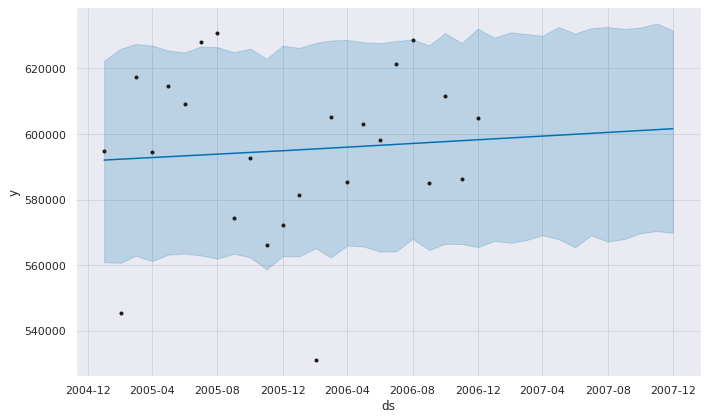

In [29]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(12, freq='MS') # MS: primer día del mes https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
forecast = m.predict(future)
fig = m.plot(forecast)

In [30]:
# Save predictions
pred_prophet = pd.DataFrame(forecast.yhat[-12:].values, index = forecast[-12:].ds.values)
pred_prophet.head(2)

,0
2007-01-01,598541.810255
2007-02-01,598827.895834


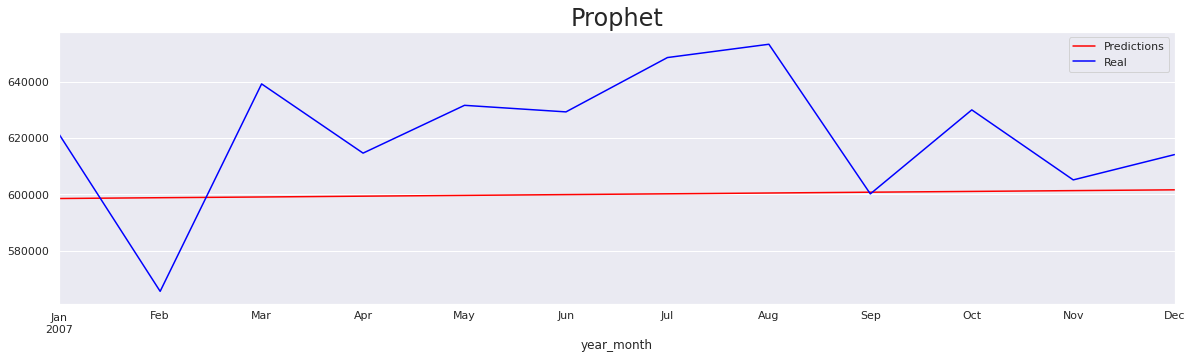

In [31]:
pred_prophet.plot(figsize = (20,5), color = "red")
test['count'].plot(color = "blue")
plt.title("Prophet", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

### Configuración de Prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


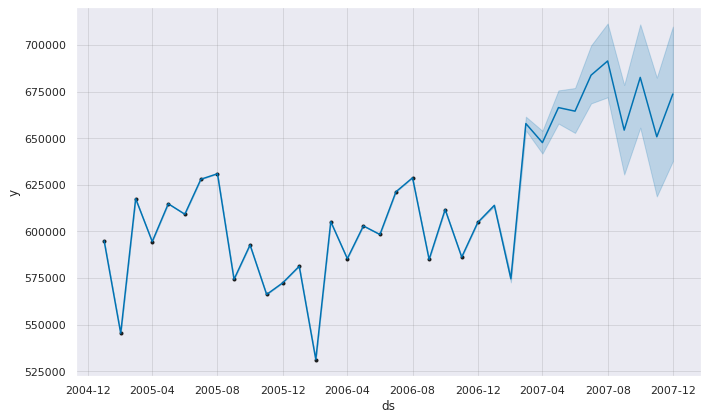

In [32]:
m = Prophet(yearly_seasonality=True)
m.fit(train)
future = m.make_future_dataframe(12, freq='MS') # MS: primer día del mes https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
forecast = m.predict(future)
fig = m.plot(forecast)

In [33]:
# Save predictions
pred_prophet = pd.DataFrame(forecast.yhat[-12:].values, index = forecast[-12:].ds.values)
pred_prophet.head(2)

,0
2007-01-01,613947.079277
2007-02-01,574573.208344


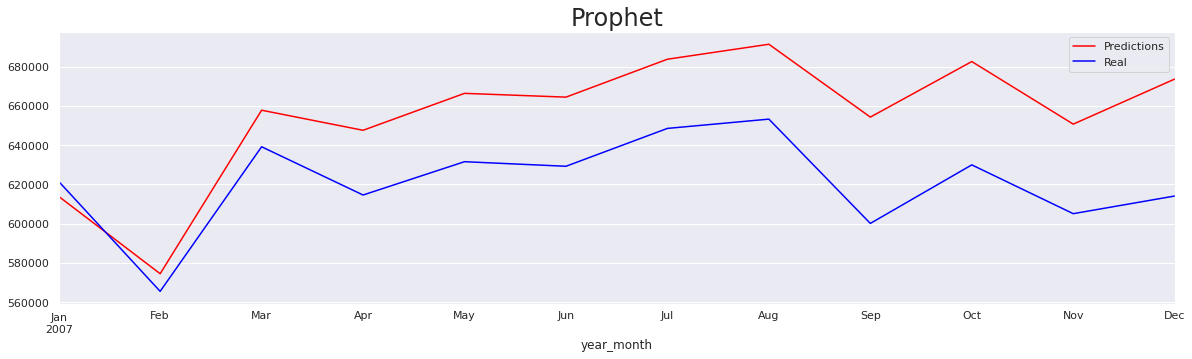

In [34]:
pred_prophet.plot(figsize = (20,5), color = "red")
test['count'].plot(color = "blue")
plt.title("Prophet", size = 24)
plt.legend(['Predictions','Real'])
plt.show()

### Comparando Auto Arima, SARIMA y Prophet


In [35]:
predictions=pd.DataFrame(pred.values,columns=['autoarima'],  index = test_autoarima.index)

In [36]:
predictions['sarima']=pred_sarima.values
predictions['prophet']=pred_prophet.values
predictions['test']=test['count']
predictions.head(2)

,autoarima,sarima,prophet,test
year_month,,,,
2007-01-01,567191.296401,580666.750377,613947.079277,621559
2007-02-01,517599.296401,531241.700076,574573.208344,565604


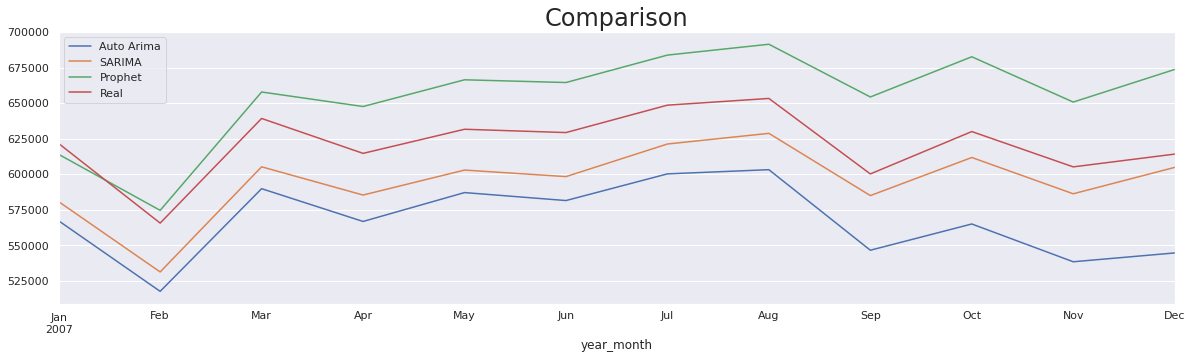

In [37]:
predictions.plot(figsize = (20,5))
plt.title("Comparison", size = 24)
plt.legend(['Auto Arima','SARIMA','Prophet','Real'])
plt.show()

### Comparación numérica

In [38]:
from sklearn.metrics import mean_squared_error 
rmse_autoarima = np.sqrt(mean_squared_error(predictions.test, predictions['autoarima']))
rmse_sarima = np.sqrt(mean_squared_error(predictions.test, predictions['sarima']))
rmse_prophet = np.sqrt(mean_squared_error(predictions.test, predictions['prophet']))
print('RMSE Autoarima:',rmse_autoarima)
print('RMSE SARIMA:',rmse_sarima)
print('RMSE Prophet:',rmse_prophet)

RMSE Autoarima: 54395.87746264397
RMSE SARIMA: 27404.656239117998
RMSE Prophet: 38765.82308895395
